# IPL and INL Segmentation

The purpose of this notebook is to use raw data (cropped to the region of interest) with the segmented data to produce a data file with only the IPL/INL regions visible.

### Imports

In [16]:
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np

### Read in Raw Data

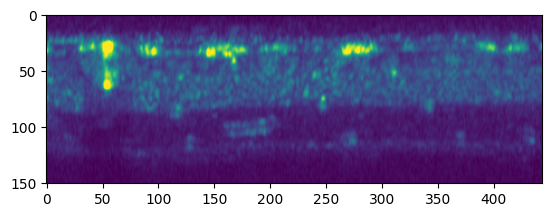

In [8]:
raw_data = skio.imread("iu_test_data_cropped.tif", plugin="tifffile")
plt.imshow(raw_data[0,:,:])

### Read in Segmentation Results

Class Values: [  0 255]


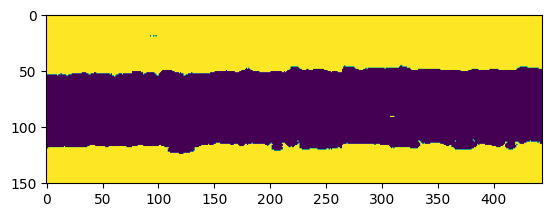

In [19]:
seg_results = skio.imread("iu_test_data_cropped_classified.tif", plugin="tifffile")
plt.imshow(seg_results[0,:,:])
print("Class Values: " + str(np.unique(seg_results)))

### Limit Raw Data to segmented areas

In [24]:
export_data = np.copy(raw_data)

for zi in range(0, len(seg_results[:,0,0])):
    for yi in range(0, len(seg_results[0,:,0])):
        for xi in range(0, len(seg_results[0,0,:])):
            if(seg_results[zi,yi,xi] == 255):
                export_data[zi,yi,xi] = 0

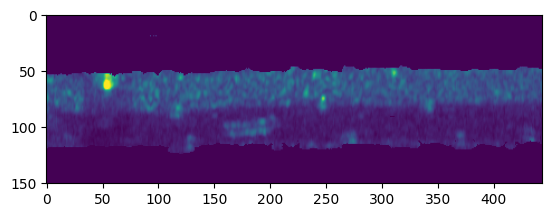

In [25]:
plt.imshow(export_data[0,:,:])

### Export to file

In [26]:
skio.imsave("iu_data_ipl_inl.tif", export_data, plugin="tifffile")